<a href="https://colab.research.google.com/github/CSF0744/ECE171B/blob/main/ECE171BHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resourses**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

 > **(a)**

From last assignment, we have the differetial equation for this circuit $V_S=CL\ddot{V}_C+\frac{1}{R}\dot{V}_C+V_C$.
If we let $x_1=V_C$ and $x_2=\dot{V}_C$, then we have
* $\dot{x_1}=x_2$

* $\dot{x_2}=\frac{RV_S-x_2-Rx_1}{RCL}$

In [8]:
R=1
L=0.25 
C=0.2
vs=1 
def f(t,X):
  x1,x2=X
  return [x2,(R*vs-x2-R*x1)/(R*C*L)]

#def  f2(X,t):
  #return [X[1],(R*vs-X[1]-R*X[0])/(R*C*L)]

In [9]:
x1 = np.linspace(-5.0, 5.0, 20)
x2 = np.linspace(-5.0, 5.0, 20)

X1, X2 = np.meshgrid(x1, x2)

[]

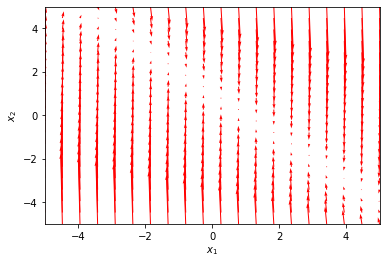

In [10]:
t = 0
u, v = np.zeros(X1.shape), np.zeros(X2.shape)
#u2, v2 = np.zeros(X1.shape), np.zeros(X2.shape)
NI, NJ = X1.shape
for i in range(NI):
    for j in range(NJ):
        x = X1[i, j]
        y = X2[i, j]
        yprime = f(t, [x, y])
        #kprime = f2([x,y],t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
        #u2[i,j] = kprime[0]
        #v2[i,j] = kprime[1]
     

Q = plt.quiver(X1, X2, u, v, color='r',scale=1000)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.plot()

This system is stable since the phase portrait converge to some points in the plane. 


> **(b)**



The corresponding ODE with initial condition is
* $\dot{x_1}=x_2,\:\: x_1(0)=0$

* $\dot{x_2}=25-25x_1-25x_2,\:\: x_2(0)=0$

[]

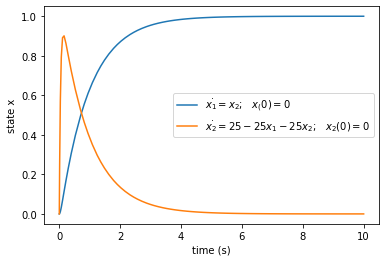

In [11]:
from scipy.integrate import solve_ivp as ode45

def func(t,X):
  return [X[1],25-25*X[0]-25*X[1]]

tspan = [0, 10]
x0 = [0, 0]
sol = ode45(func, tspan, x0); 


plt.plot(sol.t,sol.y[0]);
plt.plot(sol.t,sol.y[1]);
plt.xlabel('time (s)');
plt.ylabel('state x');
plt.legend([r'$\dot{x_1}=x_2$;   $x_(0)=0$', r'$\dot{x_2}=25-25x_1-25x_2$;   $x_2(0)=0$']);
plt.plot()

# Problem 2




> **(a)**






[]

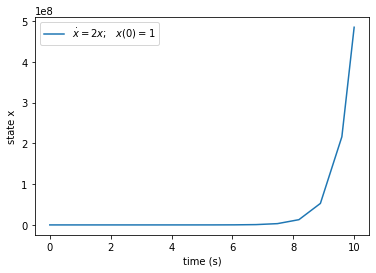

In [37]:
def func2a(t,X):
  return 2*X

x02a=[1]
sol2a=ode45(func2a,tspan,x02a);

plt.plot(sol2a.t,sol2a.y[0]);
plt.xlabel('time (s)');
plt.ylabel('state x');
plt.legend([r'$\dot{x}=2x$;   $x(0)=1$']);
plt.plot()

This time trajectory is clear not stable since it goes to infinite.


> **(b)**



[]

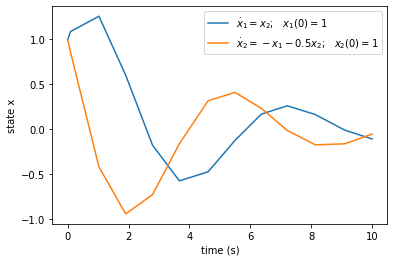

In [41]:
def func2b(t,X):
  return [X[1], -X[0]-0.5*X[1]]

x02b=[1, 1]
sol2b=ode45(func2b,[0, 10],x02b);

plt.plot(sol2b.t,sol2b.y[0]);
plt.plot(sol2b.t,sol2b.y[1]);
plt.xlabel('time (s)');
plt.ylabel('state x');
plt.legend([r'$\dot{x}_1=x_2$;   $x_1(0)=1$', r'$\dot{x}_2=-x_1-0.5x_2$;   $x_2(0)=1$']);
plt.plot()

It is hard to tell whether it is stable from this limited time span, but if we enlarge the time span to $[0,20]$, we could see that both state converge and the system is asymptotically stable.

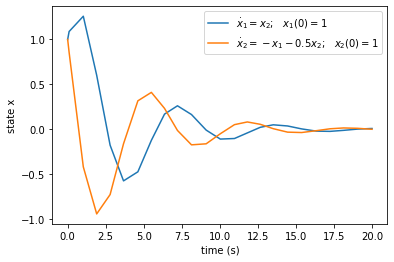

> **(c)**

Change this second order ODE into a first order ODE system. Let $x_1=x$, $x_2=\dot{x}$. Then

* $̇̇\dot{x}_1=x_2$
* $\dot{x}_2=-4x_1$

[]

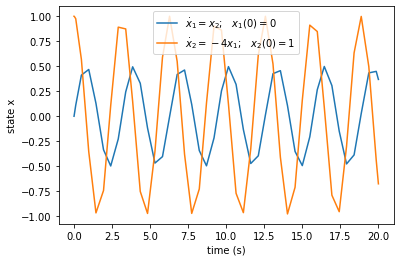

In [43]:
def func2c(t,X):
  return [X[1], -4*X[0]]

x02c=[0, 1]
sol2c=ode45(func2c,[0, 20],x02c);

plt.plot(sol2c.t,sol2c.y[0]);
plt.plot(sol2c.t,sol2c.y[1]);
plt.xlabel('time (s)');
plt.ylabel('state x');
plt.legend([r'$\dot{x}_1=x_2$;   $x_1(0)=0$', r'$\dot{x}_2=-4x_1$;   $x_2(0)=1$']);
plt.plot()

Since all the states are bounded around certain value, the system is stable.
> **(d)**

